Imports & Setup

In [1]:
# Fraud Detection - Exploratory Data Analysis (EDA)
# File: notebooks/02_EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


Load Dataset

In [2]:
# ============================================
# LOAD DATASET
# ============================================

print("="*60)
print("LOADING DATASET FOR EDA")
print("="*60)

df = pd.read_csv('../data/creditcard.csv')
print(f"✅ Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns\n")


LOADING DATASET FOR EDA
✅ Dataset loaded: 284,807 rows, 31 columns



Class Distribution Visualization

VISUALIZING CLASS DISTRIBUTION
✅ Saved: reports/class_distribution.png


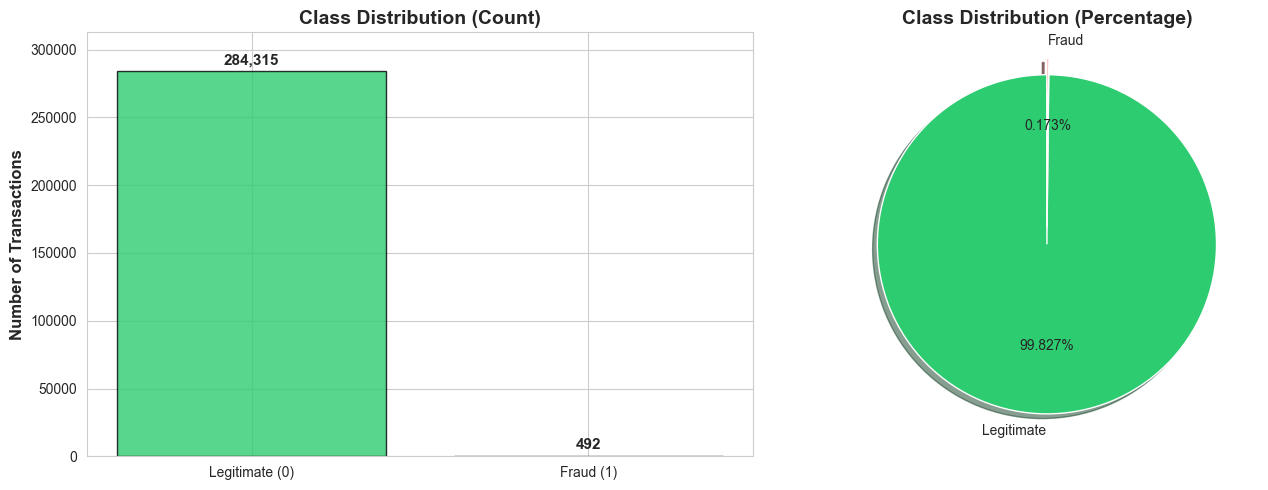

In [3]:
# ============================================
# TASK 2.1: CLASS DISTRIBUTION VISUALIZATION
# ============================================

print("="*60)
print("VISUALIZING CLASS DISTRIBUTION")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts = df['Class'].value_counts()
axes[0].bar(['Legitimate (0)', 'Fraud (1)'], class_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, class_counts[0] * 1.1])
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], autopct='%1.3f%%',
            colors=colors, explode=explode, startangle=90, shadow=True)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/class_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/class_distribution.png")
plt.show()


Amount Distribution Analysis


ANALYZING TRANSACTION AMOUNTS
✅ Saved: reports/amount_analysis.png


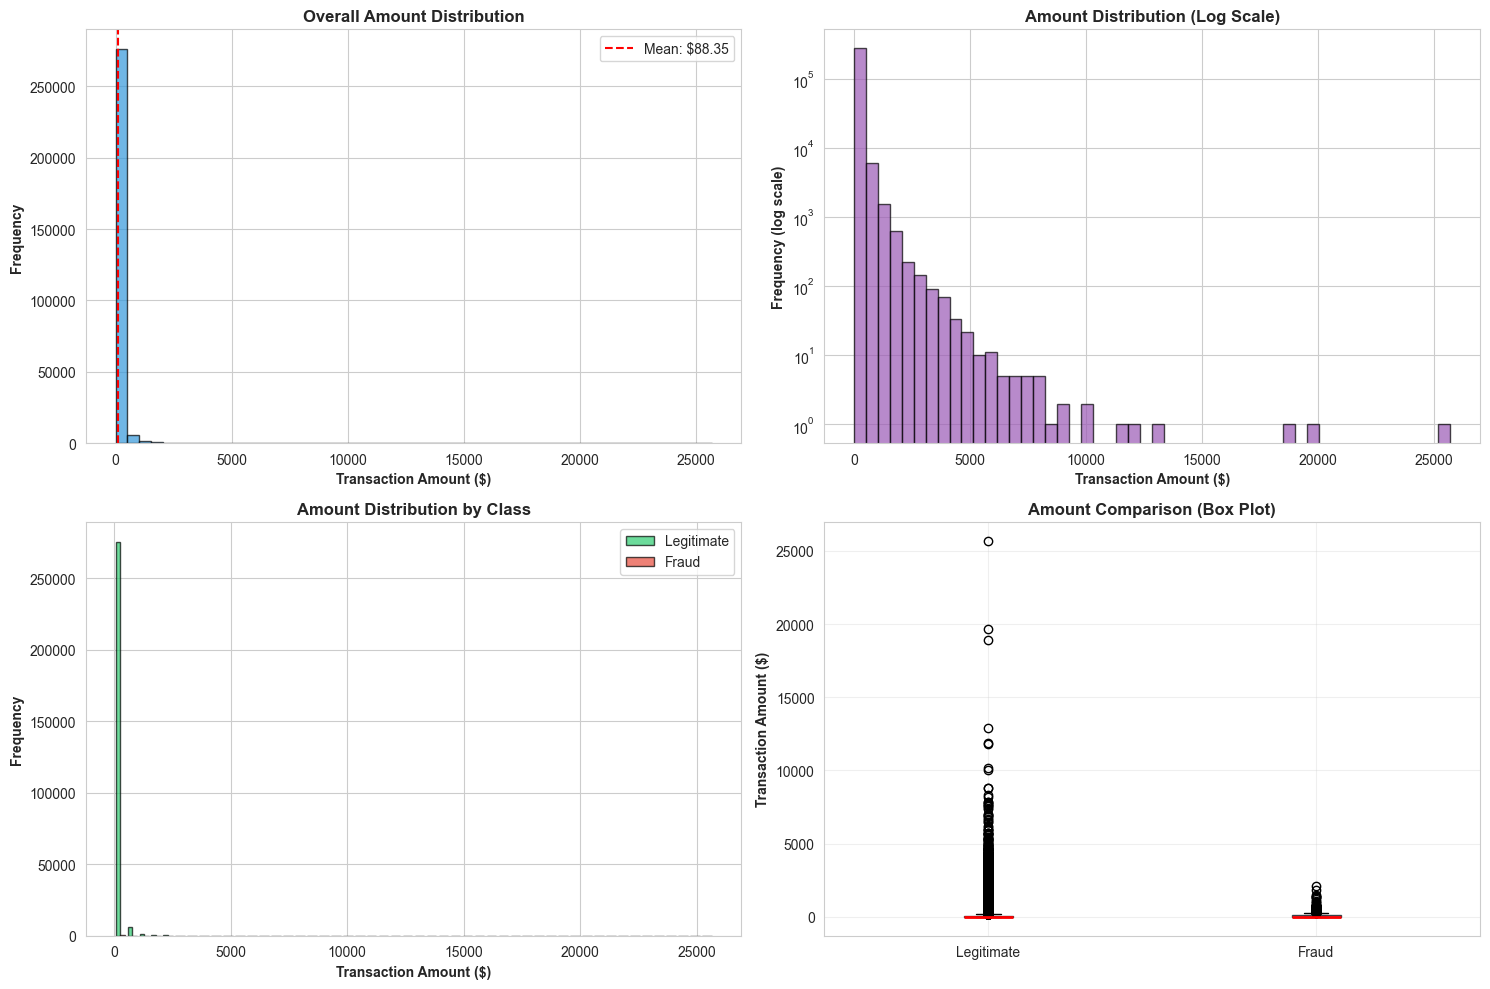


💰 Amount Statistics:
   Legitimate - Mean: $88.29, Median: $22.00
   Fraud - Mean: $122.21, Median: $9.25


In [4]:
# ============================================
# TASK 2.2: AMOUNT DISTRIBUTION ANALYSIS
# ============================================

print("\n" + "="*60)
print("ANALYZING TRANSACTION AMOUNTS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall amount distribution
axes[0, 0].hist(df['Amount'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Transaction Amount ($)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Overall Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['Amount'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df["Amount"].mean():.2f}')
axes[0, 0].legend()

# Log scale
axes[0, 1].hist(df['Amount'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Transaction Amount ($)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency (log scale)', fontweight='bold')
axes[0, 1].set_title('Amount Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_yscale('log')

# Amount by class
fraud_amounts = df[df['Class'] == 1]['Amount']
legit_amounts = df[df['Class'] == 0]['Amount']

axes[1, 0].hist([legit_amounts, fraud_amounts], bins=50, 
                label=['Legitimate', 'Fraud'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Transaction Amount ($)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# Boxplot
axes[1, 1].boxplot([legit_amounts, fraud_amounts], 
                   labels=['Legitimate', 'Fraud'],
                   patch_artist=True,
                   boxprops=dict(facecolor='#3498db', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Transaction Amount ($)', fontweight='bold')
axes[1, 1].set_title('Amount Comparison (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/amount_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/amount_analysis.png")
plt.show()

# Stats
print(f"\n💰 Amount Statistics:")
print(f"   Legitimate - Mean: ${legit_amounts.mean():.2f}, Median: ${legit_amounts.median():.2f}")
print(f"   Fraud - Mean: ${fraud_amounts.mean():.2f}, Median: ${fraud_amounts.median():.2f}")


Time Distribution Analysis


ANALYZING TIME PATTERNS
✅ Saved: reports/time_analysis.png


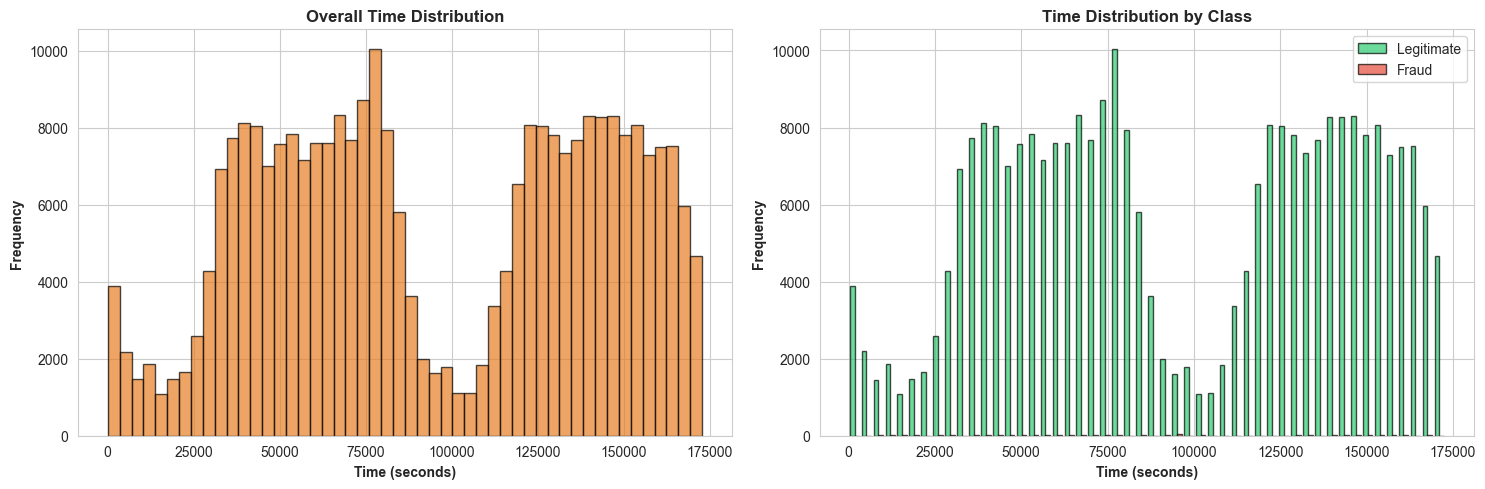

In [5]:
# ============================================
# TASK 2.3: TIME DISTRIBUTION ANALYSIS
# ============================================

print("\n" + "="*60)
print("ANALYZING TIME PATTERNS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall time
axes[0].hist(df['Time'], bins=50, color='#e67e22', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Time (seconds)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Overall Time Distribution', fontsize=12, fontweight='bold')

# By class
fraud_time = df[df['Class'] == 1]['Time']
legit_time = df[df['Class'] == 0]['Time']

axes[1].hist([legit_time, fraud_time], bins=50, 
             label=['Legitimate', 'Fraud'],
             color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Time (seconds)', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Time Distribution by Class', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/time_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/time_analysis.png")
plt.show()


Correlation Analysis


ANALYZING FEATURE CORRELATIONS

📊 Top 10 features positively correlated with Fraud:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

📊 Top 10 features negatively correlated with Fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64
✅ Saved: reports/correlation_heatmap.png


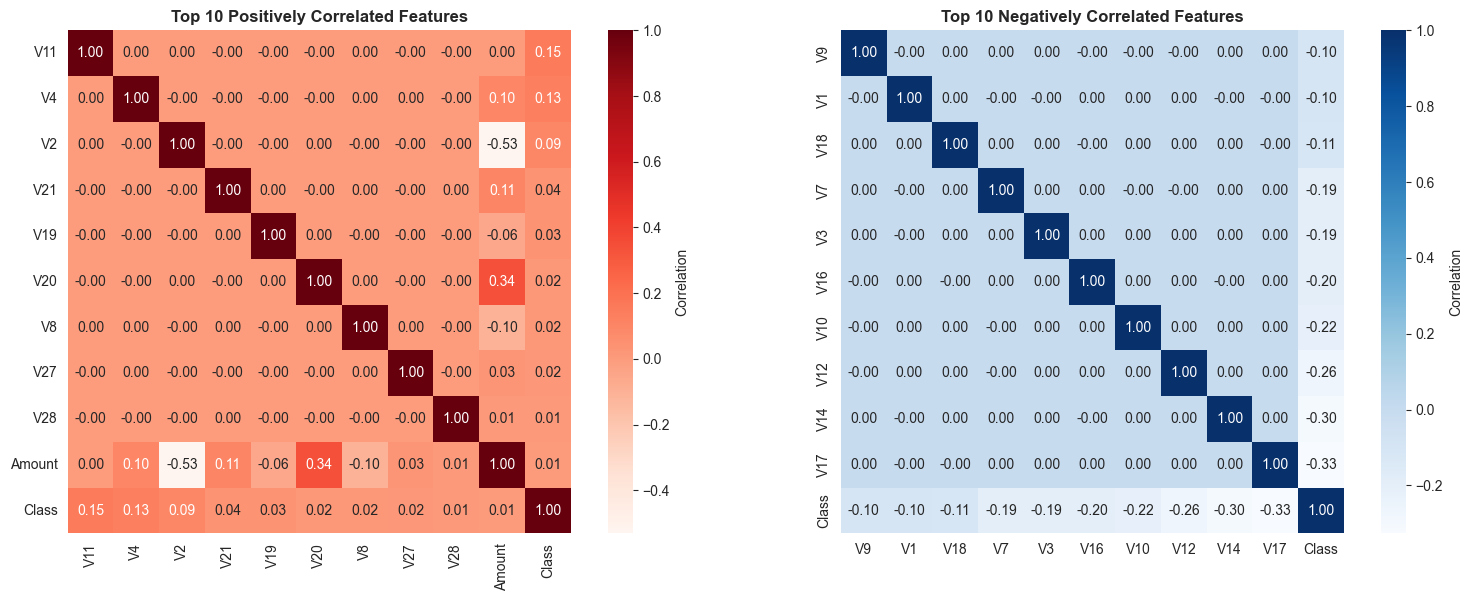

In [6]:
# ============================================
# TASK 2.4: CORRELATION ANALYSIS
# ============================================

print("\n" + "="*60)
print("ANALYZING FEATURE CORRELATIONS")
print("="*60)

# Correlation with target
correlation_with_class = df.corr()['Class'].sort_values(ascending=False)
print("\n📊 Top 10 features positively correlated with Fraud:")
print(correlation_with_class.head(11))

print("\n📊 Top 10 features negatively correlated with Fraud:")
print(correlation_with_class.tail(10))

# Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive
top_positive = correlation_with_class.head(11).index.tolist()
top_positive.remove('Class')
top_positive = top_positive[:10]
corr_matrix_pos = df[top_positive + ['Class']].corr()
sns.heatmap(corr_matrix_pos, annot=True, fmt='.2f', cmap='Reds', 
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Top 10 Positively Correlated Features', fontsize=12, fontweight='bold')

# Negative
top_negative = correlation_with_class.tail(10).index.tolist()
corr_matrix_neg = df[top_negative + ['Class']].corr()
sns.heatmap(corr_matrix_neg, annot=True, fmt='.2f', cmap='Blues', 
            square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Top 10 Negatively Correlated Features', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/correlation_heatmap.png")
plt.show()


V-Features Distribution


ANALYZING V FEATURES DISTRIBUTIONS
✅ Saved: reports/v_features_distribution.png


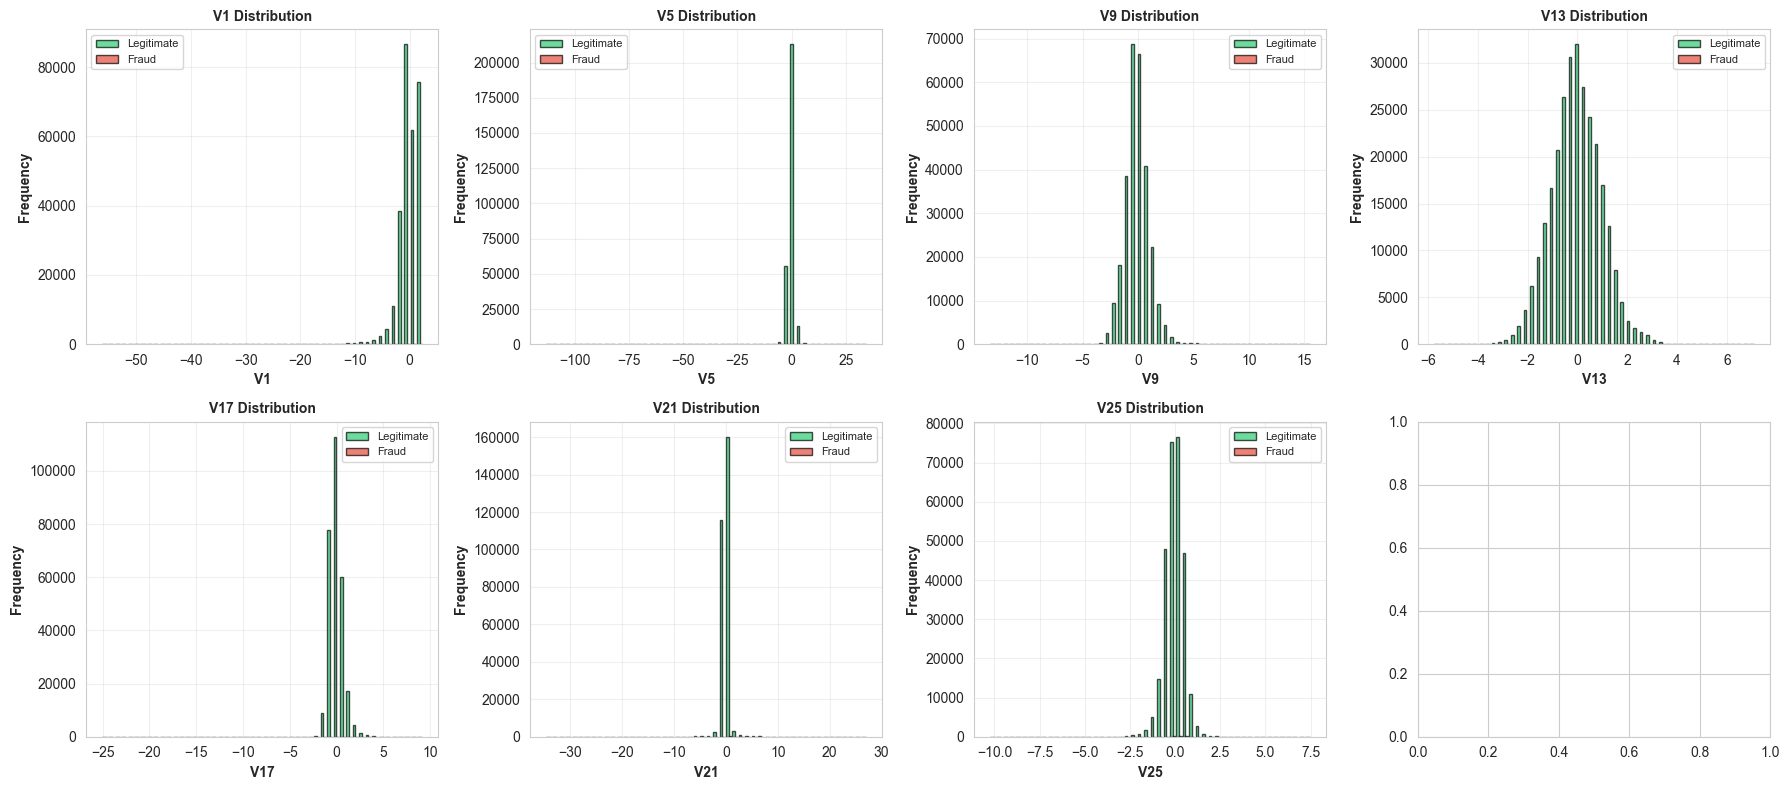

In [7]:
# ============================================
# TASK 2.5: FEATURE DISTRIBUTIONS (V1-V28)
# ============================================

print("\n" + "="*60)
print("ANALYZING V FEATURES DISTRIBUTIONS")
print("="*60)

v_features = [col for col in df.columns if col.startswith('V')]
selected_v_features = v_features[::4]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for idx, feature in enumerate(selected_v_features[:8]):
    axes[idx].hist([df[df['Class'] == 0][feature], df[df['Class'] == 1][feature]], 
                   bins=50, label=['Legitimate', 'Fraud'],
                   color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel(feature, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontweight='bold')
    axes[idx].set_title(f'{feature} Distribution', fontsize=10, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/v_features_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/v_features_distribution.png")
plt.show()


Outlier Analysis

In [8]:
# ============================================
# TASK 2.6: OUTLIER ANALYSIS
# ============================================

print("\n" + "="*60)
print("OUTLIER DETECTION")
print("="*60)

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < Q1 - 1.5*IQR) | (df['Amount'] > Q3 + 1.5*IQR)]

print(f"\n📊 Outlier Statistics (Amount):")
print(f"   - Total outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"   - Q1 (25%): ${Q1:.2f}")
print(f"   - Q3 (75%): ${Q3:.2f}")
print(f"   - IQR: ${IQR:.2f}")



OUTLIER DETECTION

📊 Outlier Statistics (Amount):
   - Total outliers: 31,904 (11.20%)
   - Q1 (25%): $5.60
   - Q3 (75%): $77.16
   - IQR: $71.56


Final EDA Summary

In [9]:
# ============================================
# FINAL EDA SUMMARY
# ============================================

print("\n" + "="*60)
print("EDA SUMMARY & KEY INSIGHTS")
print("="*60)

print(f"""
✅ EDA Complete! Key Findings:

📊 Class Imbalance:
   - Fraud: {(df['Class'].sum()/len(df)*100):.3f}%
   - Legitimate: {((len(df)-df['Class'].sum())/len(df)*100):.3f}%
   
💰 Transaction Amounts:
   - Fraud transactions have slightly different amount patterns
   - Mean fraud amount: ${fraud_amounts.mean():.2f}
   - Mean legitimate amount: ${legit_amounts.mean():.2f}
   
⏰ Time Patterns:
   - Transactions span ~2 days
   - Fraud occurs throughout the time period
   
🔗 Feature Correlations:
   - V features show varying correlations with fraud
   - Some V features are strong fraud indicators
   
⚠️ Next Steps:
   1. Handle class imbalance (SMOTE/undersampling)
   2. Scale Amount and Time features
   3. Split data for training/testing
   4. Build baseline model
""")

print("\n🎉 Task 2 Complete! All visualizations saved in reports/")



EDA SUMMARY & KEY INSIGHTS

✅ EDA Complete! Key Findings:

📊 Class Imbalance:
   - Fraud: 0.173%
   - Legitimate: 99.827%

💰 Transaction Amounts:
   - Fraud transactions have slightly different amount patterns
   - Mean fraud amount: $122.21
   - Mean legitimate amount: $88.29

⏰ Time Patterns:
   - Transactions span ~2 days
   - Fraud occurs throughout the time period

🔗 Feature Correlations:
   - V features show varying correlations with fraud
   - Some V features are strong fraud indicators

⚠️ Next Steps:
   1. Handle class imbalance (SMOTE/undersampling)
   2. Scale Amount and Time features
   3. Split data for training/testing
   4. Build baseline model


🎉 Task 2 Complete! All visualizations saved in reports/
